In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# EDA

In [3]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## CustomerID

In [6]:
df.drop('CustomerID', axis =1, inplace=True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


## Gender

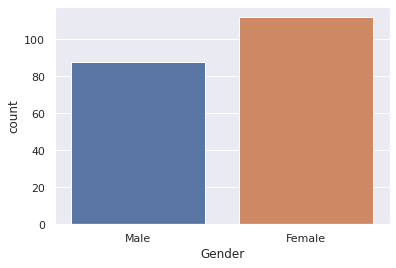

In [7]:
sns.countplot(x= df.Gender);

## Age

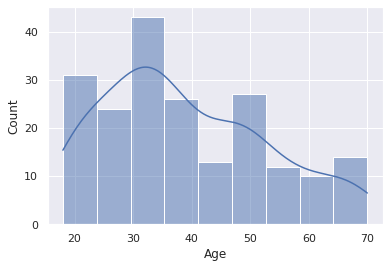

In [8]:
sns.histplot(df.Age, kde=True);

## Annual Income (k$)

In [9]:
df.rename({'Annual Income (k$)': 'Income'}, axis =1, inplace = True)

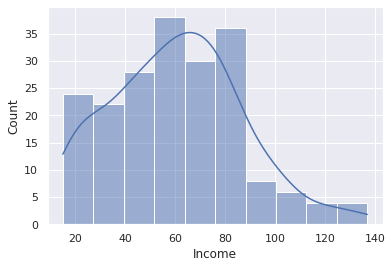

In [10]:
sns.histplot(df.Income, kde=True);

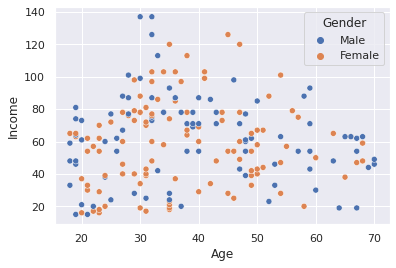

In [11]:
sns.scatterplot(y= df.Income, x= df.Age, hue= df.Gender);

## Spending Score (1-100)

In [12]:
df.rename({'Spending Score (1-100)': 'Score'}, axis =1, inplace = True)

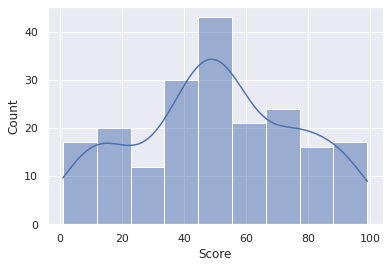

In [13]:
sns.histplot(df.Score, kde=True);

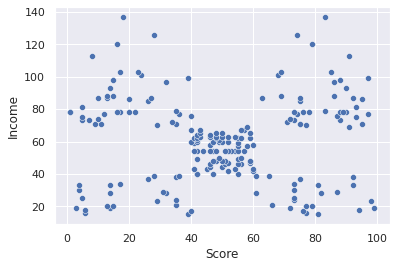

In [14]:
sns.scatterplot(y= df.Income, x= df.Score);

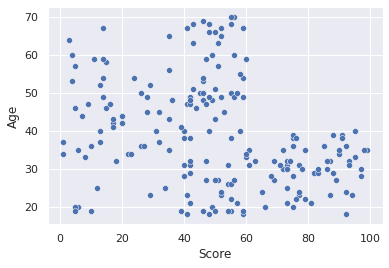

In [15]:
sns.scatterplot(y= df.Age, x= df.Score);

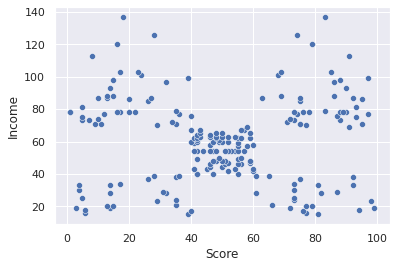

In [16]:
sns.scatterplot(y= df.Income, x= df.Score);

This is the most informative visualization till now, as we can observe about 5 clusters:
1. Low Score, Low Income
2. Low Score, High Income
3. Mid Score, Mid Income
4. High Score, Low Income
5. High Score, High Income

**Considering only those two features, we can build our first**

In [17]:
X= df[['Income', 'Score']].values

# Clustering using K-means

In [18]:
from sklearn.cluster import KMeans

km5 = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_pred = km5.fit_predict(X)

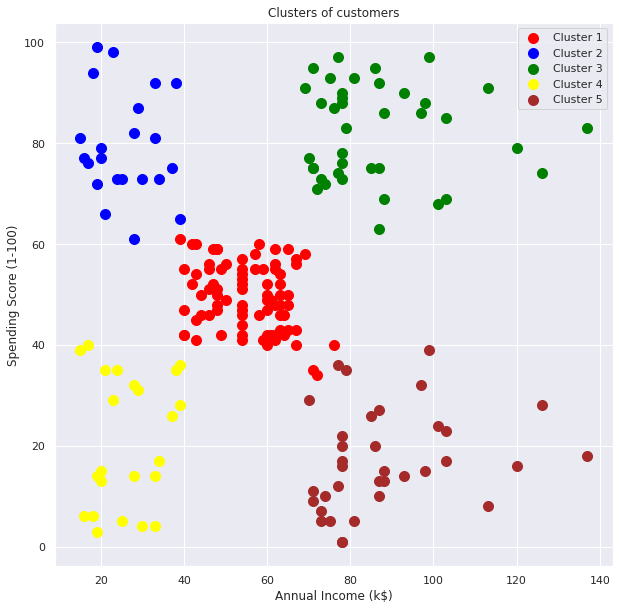

In [19]:
#Visualizing all the clusters 
plt.figure(figsize=(10,10))
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_pred == 3, 0], X[y_pred == 3, 1], s = 100, c = 'yellow', label = 'Cluster 4')
plt.scatter(X[y_pred == 4, 0], X[y_pred == 4, 1], s = 100, c = 'brown', label = 'Cluster 5')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

**We can try different number of clusters to find the optimum number of clusters using Elbow Method**

## Elbow Method

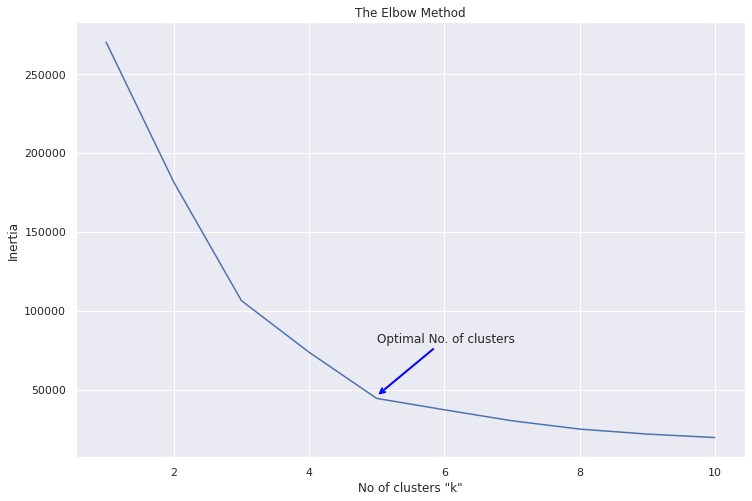

In [20]:
# Within-cluster Sum of Squares (Inertia)
inertia=[]
k_range= range(1,11)

for i in k_range:
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

#Visualizing the ELBOW method to get the optimal value of K 
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=k_range, y=inertia, ax=ax)
plt.title('The Elbow Method')
plt.xlabel('No of clusters "k"')
plt.ylabel('Inertia')

# Annotate arrow
ax.annotate('Optimal No. of clusters', xy=(5, 46000), xytext=(5, 80000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.show()


> ## Elbow Method shows that the optimal number of clusters is 5

# Silhouette Score for K-Means Clusters

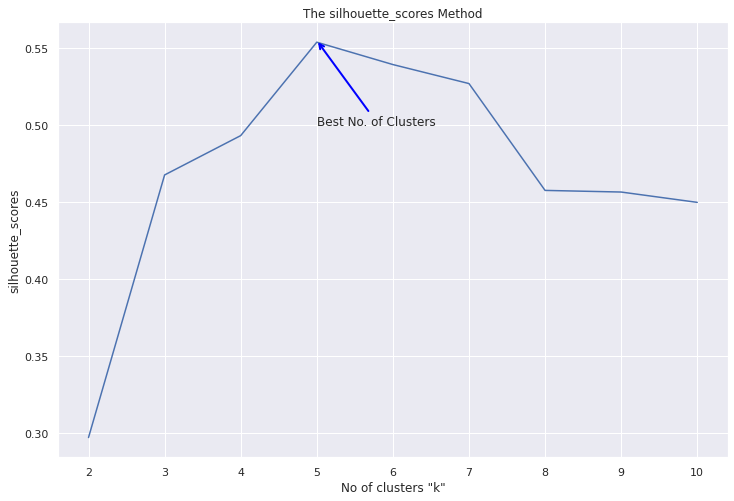

In [21]:
from sklearn.metrics import silhouette_score 
silhouette_scores=[]
k_range= range(2,11)

for i in k_range:
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_, metric='euclidean'))

#Visualizing the silhouette_scores method to get the optimal value of K 
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=k_range, y=silhouette_scores, ax=ax)
plt.title('The silhouette_scores Method')
plt.xlabel('No of clusters "k"')
plt.ylabel('silhouette_scores')

# Annotate arrow
ax.annotate('Best No. of Clusters', xy=(5, 0.555), xytext=(5, 0.50), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))


plt.show()


## Try all features

In [22]:
X= pd.get_dummies(df, drop_first= True)
X

,Age,Income,Score,Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,1
198,32,137,18,1


In [23]:
from sklearn.cluster import KMeans

km5 = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_pred = km5.fit_predict(X.values)

In [24]:
X

,Age,Income,Score,Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,1
198,32,137,18,1


In [25]:
X= X.values

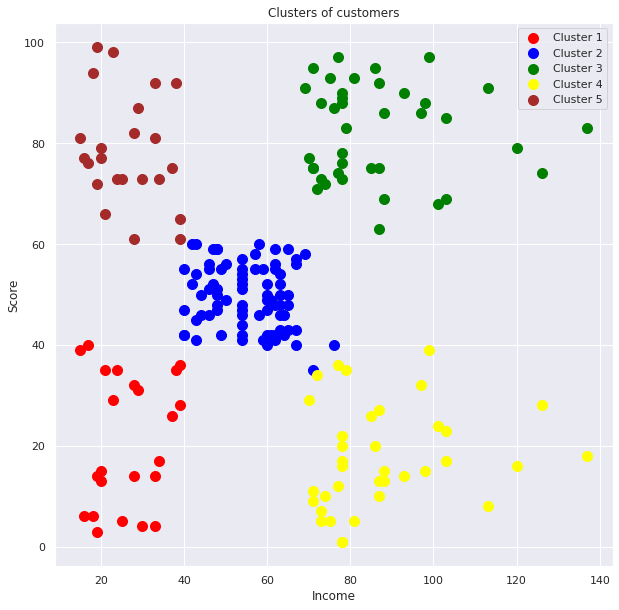

In [26]:
#Visualizing all the clusters 
plt.figure(figsize=(10,10))
plt.scatter(X[y_pred == 0, 1], X[y_pred == 0, 2], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_pred == 1, 1], X[y_pred == 1, 2], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_pred == 2, 1], X[y_pred == 2, 2], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_pred == 3, 1], X[y_pred == 3, 2], s = 100, c = 'yellow', label = 'Cluster 4')
plt.scatter(X[y_pred == 4, 1], X[y_pred == 4, 2], s = 100, c = 'brown', label = 'Cluster 5')

plt.title('Clusters of customers')
plt.xlabel('Income')
plt.ylabel('Score')
plt.legend()
plt.show()

# Clustering using Hierarchical Clustering

## Using the dendrogram to find the optimal number of clusters

In [27]:
X= df[['Income', 'Score']].values

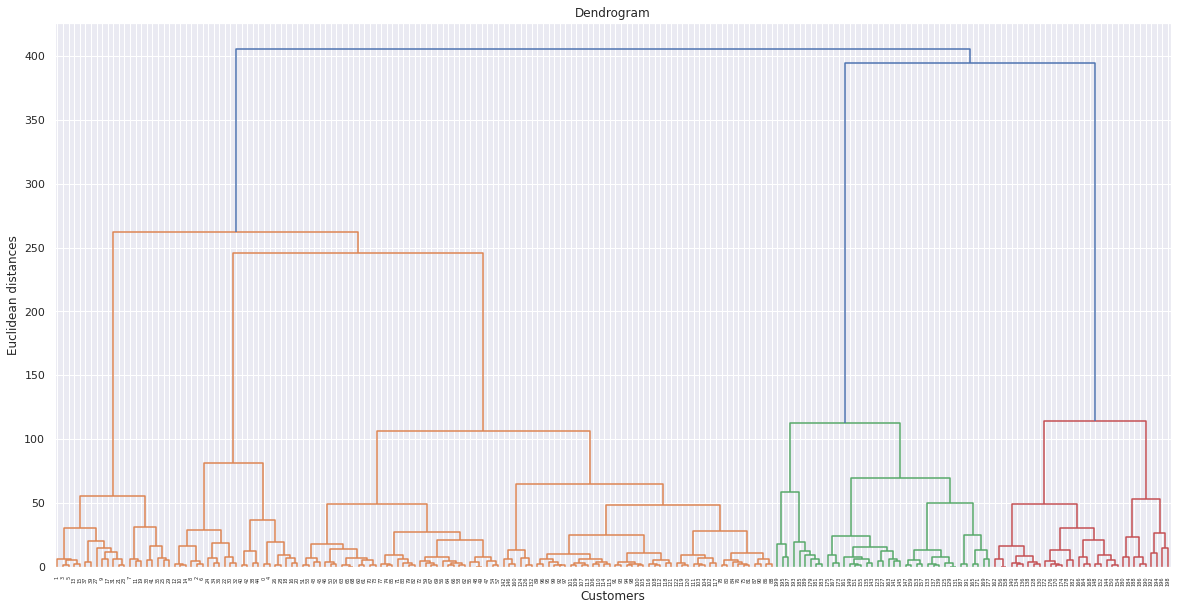

In [28]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

### Dendrogram also shows 5 clusters is the optimal No. of Clusters

In [29]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

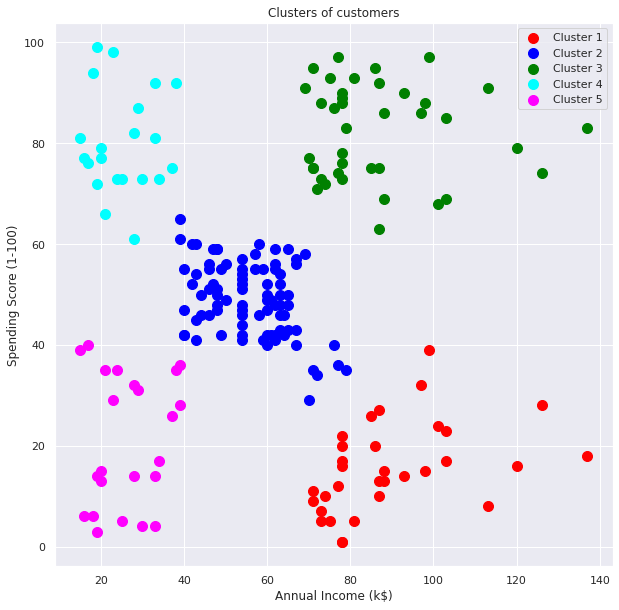

In [30]:
plt.figure(figsize=(10,10))

plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Wrap Up All in One Place


In [31]:
def clustering(X= df[['Income', 'Score']].values):
    #Kmeans
    from sklearn.cluster import KMeans
    km5 = KMeans(n_clusters= 5, init='k-means++', random_state=0)
    y_pred = km5.fit_predict(X)
    
    #Visualizing all the clusters 
    fig= plt.figure(figsize=(20,15))
    fig.add_subplot(221)
    plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
    plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
    plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
    plt.scatter(X[y_pred == 3, 0], X[y_pred == 3, 1], s = 100, c = 'yellow', label = 'Cluster 4')
    plt.scatter(X[y_pred == 4, 0], X[y_pred == 4, 1], s = 100, c = 'brown', label = 'Cluster 5')

    plt.title('Kmeans Clustering of customers')
    plt.xlabel('Income')
    plt.ylabel('Score')
    plt.legend()
    
    #Agglomerative
    from sklearn.cluster import AgglomerativeClustering
    hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
    y_hc = hc.fit_predict(X)
   
    fig.add_subplot(222)
    plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
    plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
    plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
    plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
    plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
    plt.title('Agglomerative Clusters of customers')
    plt.xlabel('Income')
    plt.ylabel('Score')
    plt.legend()
    plt.show()

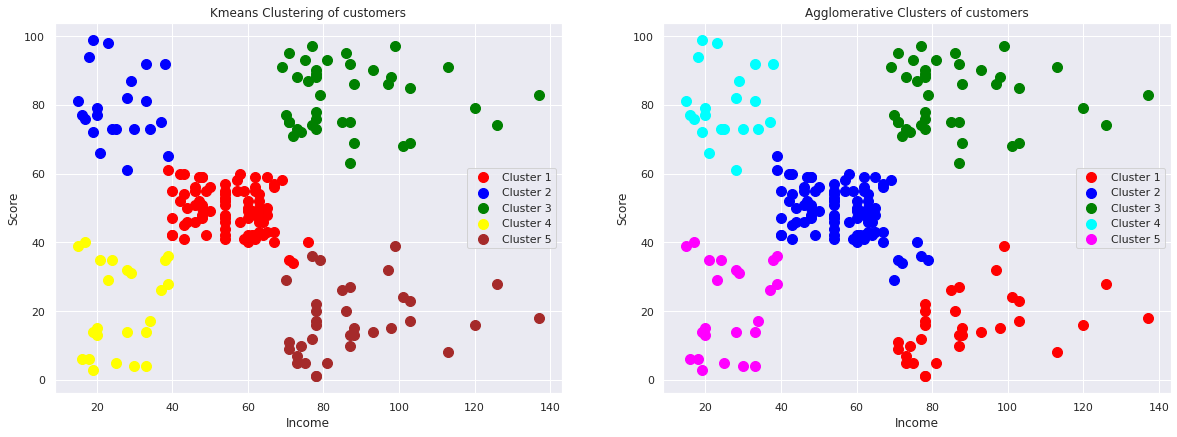

In [32]:
clustering()